# Machine Learning Model

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

### 1. Clean & Prepare Dataset

In [2]:
# Read csv into dataframe
df = pd.read_csv(os.path.join("Resources", "customer_data.csv"))
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
# Check for null values
for x in df:
    print(f' Column {x}: Unique Value(s): {pd.isna(df[x]).unique()}') 

 Column id: Unique Value(s): [False]
 Column Gender: Unique Value(s): [False]
 Column Age: Unique Value(s): [False]
 Column Driving_License: Unique Value(s): [False]
 Column Region_Code: Unique Value(s): [False]
 Column Previously_Insured: Unique Value(s): [False]
 Column Vehicle_Age: Unique Value(s): [False]
 Column Vehicle_Damage: Unique Value(s): [False]
 Column Annual_Premium: Unique Value(s): [False]
 Column Policy_Sales_Channel: Unique Value(s): [False]
 Column Vintage: Unique Value(s): [False]
 Column Response: Unique Value(s): [False]


In [4]:
# Drop id column
# df = df.drop(['id'], axis=1)

In [5]:
# Check data types
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
# Convert objects in Gender column into numeric values
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

In [7]:
# Convert objects in Vehicle Age column into numeric values
df['Vehicle_Age'] = df['Vehicle_Age'].replace('< 1 Year', 1)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('1-2 Year', 2)
df['Vehicle_Age'] = df['Vehicle_Age'].replace('> 2 Years', 3)

In [8]:
# Convert objects in Vehicle Damage column into numeric values
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('Yes', 1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace('No', 0)

In [9]:
# Check data types again to ensure all objects are converted
df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
# View df
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### 2. Run K Nearest Neighborbors Algorithm

In [11]:
y = df['Response']

In [12]:
X = df.drop('Response', axis=1)
X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.826
k: 3, Train/Test Score: 0.913/0.847
k: 5, Train/Test Score: 0.896/0.857
k: 7, Train/Test Score: 0.890/0.861
k: 9, Train/Test Score: 0.887/0.865
k: 11, Train/Test Score: 0.884/0.867
k: 13, Train/Test Score: 0.883/0.869
k: 15, Train/Test Score: 0.882/0.871
k: 17, Train/Test Score: 0.881/0.871
k: 19, Train/Test Score: 0.881/0.872


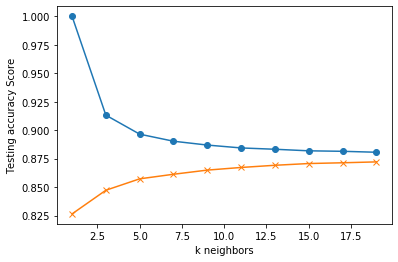

In [34]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# K using square root method i.e. 381110^(1/2)
knn = KNeighborsClassifier(n_neighbors=617)
knn.fit(X_train_scaled, y_train)
print('k=617 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=617 Test Acc: 0.877
